Seasons Of Code 2024 assignment 2

Variational Auto Encoders For Image Generation

In [ ]:
#@title Importing Libraries
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Lambda, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.losses import binary_crossentropy
import numpy as np

from tensorflow.keras import backend as K

In [ ]:
#@title Loading MNIST dataset and
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [ ]:
#@title Simple Encoder and Decoder
# Encoder
inputs = Input(shape=(28, 28, 1))
x = Flatten()(inputs)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
z_mean = Dense(2)(x)
z_log_var = Dense(2)(x)

def sampling(args):
    z_mean, z_log_var = args
    batch = tf.shape(z_mean)[0]
    dim = tf.shape(z_mean)[1]
    epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = Lambda(sampling, output_shape=(2,))([z_mean, z_log_var])

# Decoder
decoder_input = Input(shape=(2,))
x = Dense(128, activation='relu')(decoder_input)
x = Dense(256, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(28 * 28 * 1, activation='sigmoid')(x)
outputs = Reshape((28, 28, 1))(x)

# Models
encoder_vanilla = Model(inputs, [z_mean, z_log_var, z])
decoder_vanilla = Model(decoder_input, outputs)
outputs = decoder_vanilla(encoder_vanilla(inputs)[2])
vae_vanilla = Model(inputs, outputs)

# Loss
reconstruction_loss = binary_crossentropy(K.flatten(inputs), K.flatten(outputs))
reconstruction_loss *= 28 * 28
kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae_vanilla.add_loss(vae_loss)
vae_vanilla.compile(optimizer='adam')

# Training
vae_vanilla.fit(x_train, epochs=50, batch_size=128, validation_data=(x_test, None))

Epoch 1/50
469/469 [==============================] - 15s 29ms/step - loss: 186.9713 - val_loss: 165.9822
Epoch 2/50
469/469 [==============================] - 15s 32ms/step - loss: 160.7387 - val_loss: 157.0868
Epoch 3/50
469/469 [==============================] - 15s 31ms/step - loss: 154.9907 - val_loss: 152.6281
Epoch 4/50
469/469 [==============================] - 14s 29ms/step - loss: 151.8676 - val_loss: 151.3714
Epoch 5/50
469/469 [==============================] - 13s 28ms/step - loss: 149.6497 - val_loss: 148.0452
Epoch 6/50
469/469 [==============================] - 14s 29ms/step - loss: 147.8153 - val_loss: 147.2248
Epoch 7/50
469/469 [==============================] - 13s 28ms/step - loss: 146.3789 - val_loss: 146.0217
Epoch 8/50
469/469 [==============================] - 13s 28ms/step - loss: 145.3397 - val_loss: 145.3275
Epoch 9/50
469/469 [==============================] - 13s 27ms/step - loss: 144.3775 - val_loss: 144.5047
Epoch 10/50
469/469 [=========================

In [ ]:
#@title Encoder with encoder-decoder architecture
inputs = Input(shape=(28, 28, 1))
x = Flatten()(inputs)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(28*28*1, activation='relu')(x)
z_mean = Dense(2)(x)
z_log_var = Dense(2)(x)

z = Lambda(sampling, output_shape=(2,))([z_mean, z_log_var])

# Decoder remains the same
decoder_input = Input(shape=(2,))
x = Dense(128, activation='relu')(decoder_input)
x = Dense(256, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(28 * 28 * 1, activation='sigmoid')(x)
outputs = Reshape((28, 28, 1))(x)

# Models
encoder_encoder = Model(inputs, [z_mean, z_log_var, z])
decoder_encoder = Model(decoder_input, outputs)
outputs = decoder_encoder(encoder_encoder(inputs)[2])
vae_encoder = Model(inputs, outputs)

# Loss and Training
reconstruction_loss = binary_crossentropy(K.flatten(inputs), K.flatten(outputs))
reconstruction_loss *= 28 * 28
kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae_encoder.add_loss(vae_loss)
vae_encoder.compile(optimizer='adam')

vae_encoder.fit(x_train, epochs=50, batch_size=128, validation_data=(x_test, None))


Epoch 1/50
469/469 [==============================] - 29s 58ms/step - loss: 191.4942 - val_loss: 166.8377
Epoch 2/50
469/469 [==============================] - 24s 51ms/step - loss: 161.4041 - val_loss: 155.4847
Epoch 3/50
469/469 [==============================] - 88s 188ms/step - loss: 153.7051 - val_loss: 151.8254
Epoch 4/50
469/469 [==============================] - 92s 196ms/step - loss: 151.7037 - val_loss: 149.7525
Epoch 5/50
469/469 [==============================] - 41s 87ms/step - loss: 151.3931 - val_loss: 153.6779
Epoch 6/50
469/469 [==============================] - 20s 44ms/step - loss: 149.0099 - val_loss: 148.0294
Epoch 7/50
469/469 [==============================] - 21s 45ms/step - loss: 150.7229 - val_loss: 148.5315
Epoch 8/50
469/469 [==============================] - 21s 44ms/step - loss: 149.1223 - val_loss: 149.4211
Epoch 9/50
469/469 [==============================] - 20s 42ms/step - loss: 150.8605 - val_loss: 149.1859
Epoch 10/50
469/469 [=======================

In [ ]:
#@title Decoder with encoder-decoder architecture

#Encoder remains the same
inputs = Input(shape=(28, 28, 1))
x = Flatten()(inputs)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
z_mean = Dense(2)(x)
z_log_var = Dense(2)(x)

z = Lambda(sampling, output_shape=(2,))([z_mean, z_log_var])

# Decoder with encoder-decoder architecture
decoder_input = Input(shape=(2,))
x = Dense(128, activation='relu')(decoder_input)
x = Dense(256, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(28 * 28 * 1, activation='sigmoid')(x)
outputs = Reshape((28, 28, 1))(x)

# Models
encoder_decoder = Model(inputs, [z_mean, z_log_var, z])
decoder_decoder = Model(decoder_input, outputs)
outputs = decoder_decoder(encoder_decoder(inputs)[2])
vae_decoder = Model(inputs, outputs)

# Loss and Training
reconstruction_loss = binary_crossentropy(K.flatten(inputs), K.flatten(outputs))
reconstruction_loss *= 28 * 28
kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae_decoder.add_loss(vae_loss)
vae_decoder.compile(optimizer='adam')

vae_decoder.fit(x_train, epochs=50, batch_size=128, validation_data=(x_test, None))


Epoch 1/50
469/469 [==============================] - 16s 31ms/step - loss: 192.1860 - val_loss: 169.2948
Epoch 2/50
469/469 [==============================] - 14s 29ms/step - loss: 161.5047 - val_loss: 157.4339
Epoch 3/50
469/469 [==============================] - 14s 30ms/step - loss: 155.5657 - val_loss: 152.7056
Epoch 4/50
469/469 [==============================] - 14s 29ms/step - loss: 152.0322 - val_loss: 149.8919
Epoch 5/50
469/469 [==============================] - 14s 30ms/step - loss: 149.7641 - val_loss: 148.8482
Epoch 6/50
469/469 [==============================] - 14s 30ms/step - loss: 147.7870 - val_loss: 147.2815
Epoch 7/50
469/469 [==============================] - 15s 31ms/step - loss: 147.0848 - val_loss: 145.8253
Epoch 8/50
469/469 [==============================] - 14s 31ms/step - loss: 145.6235 - val_loss: 145.2017
Epoch 9/50
469/469 [==============================] - 15s 32ms/step - loss: 145.2474 - val_loss: 144.8517
Epoch 10/50
469/469 [=========================

In [ ]:
#@title Encoder and Decoder with encoder-decoder architecture

# Encoder with encoder-decoder architecture
inputs = Input(shape=(28, 28, 1))
x = Flatten()(inputs)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(28*28*1, activation='relu')(x)
z_mean = Dense(2)(x)
z_log_var = Dense(2)(x)

z = Lambda(sampling, output_shape=(2,))([z_mean, z_log_var])

# Decoder with encoder-decoder architecture
decoder_input = Input(shape=(2,))
x = Dense(128, activation='relu')(decoder_input)
x = Dense(256, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(28 * 28 * 1, activation='sigmoid')(x)
outputs = Reshape((28, 28, 1))(x)

# Models
encoder = Model(inputs, [z_mean, z_log_var, z])
decoder = Model(decoder_input, outputs)
outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs)

# Loss and Training
reconstruction_loss = binary_crossentropy(K.flatten(inputs), K.flatten(outputs))
reconstruction_loss *= 28 * 28
kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

vae.fit(x_train, epochs=50, batch_size=128, validation_data=(x_test, None))


Epoch 1/50
469/469 [==============================] - 24s 47ms/step - loss: 196.2839 - val_loss: 180.6332
Epoch 2/50
469/469 [==============================] - 21s 45ms/step - loss: 176.5529 - val_loss: 174.1841
Epoch 3/50
469/469 [==============================] - 23s 49ms/step - loss: 171.7349 - val_loss: 170.2767
Epoch 4/50
469/469 [==============================] - 22s 46ms/step - loss: 168.9078 - val_loss: 167.2283
Epoch 5/50
469/469 [==============================] - 22s 46ms/step - loss: 169.6440 - val_loss: 177.0203
Epoch 6/50
469/469 [==============================] - 21s 45ms/step - loss: 165.9524 - val_loss: 161.1774
Epoch 7/50
469/469 [==============================] - 21s 45ms/step - loss: 157.9545 - val_loss: 156.6195
Epoch 8/50
469/469 [==============================] - 20s 43ms/step - loss: 154.5277 - val_loss: 155.0727
Epoch 9/50
469/469 [==============================] - 22s 46ms/step - loss: 154.9979 - val_loss: 160.6494
Epoch 10/50
469/469 [=========================

In [ ]:
#@title Visualising Results
import matplotlib.pyplot as plt
import os

def plot_results(models, data, batch_size=128, model_name="vae_mnist"):
    encoder, decoder = models
    x_test, y_test = data
    os.makedirs(model_name, exist_ok=True)

    filename = os.path.join(model_name, "vae_mean.png")
    z_mean, _, _ = encoder.predict(x_test, batch_size=batch_size)
    plt.figure(figsize=(12, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=y_test)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.savefig(filename)
    plt.show()

    filename = os.path.join(model_name, "digits_over_latent.png")
    n = 15  # figure with 15x15 digits
    digit_size = 28
    figure = np.zeros((digit_size * n, digit_size * n))
    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(-4, 4, n)
    grid_y = np.linspace(-4, 4, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[i * digit_size: (i + 1) * digit_size,
                   j * digit_size: (j + 1) * digit_size] = digit

    plt.figure(figsize=(10, 10))
    plt.imshow(figure, cmap='Greys_r')
    plt.savefig(filename)
    plt.show()

79/79 [==============================] - 1s 6ms/step


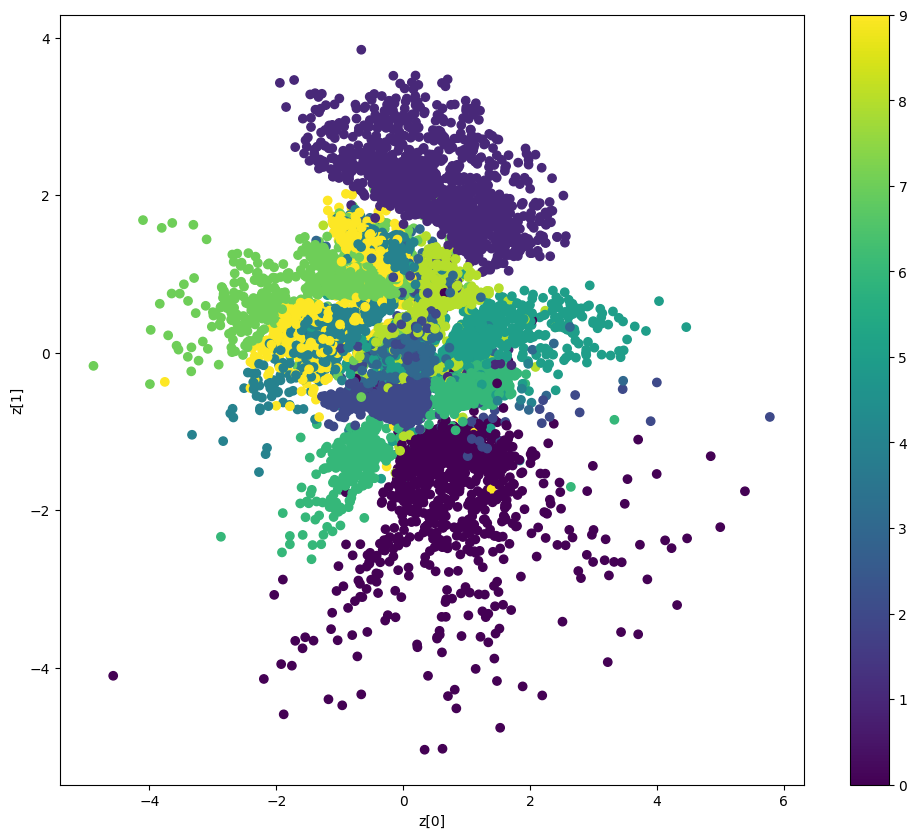

1/1 [==============================] - 0s 15ms/step


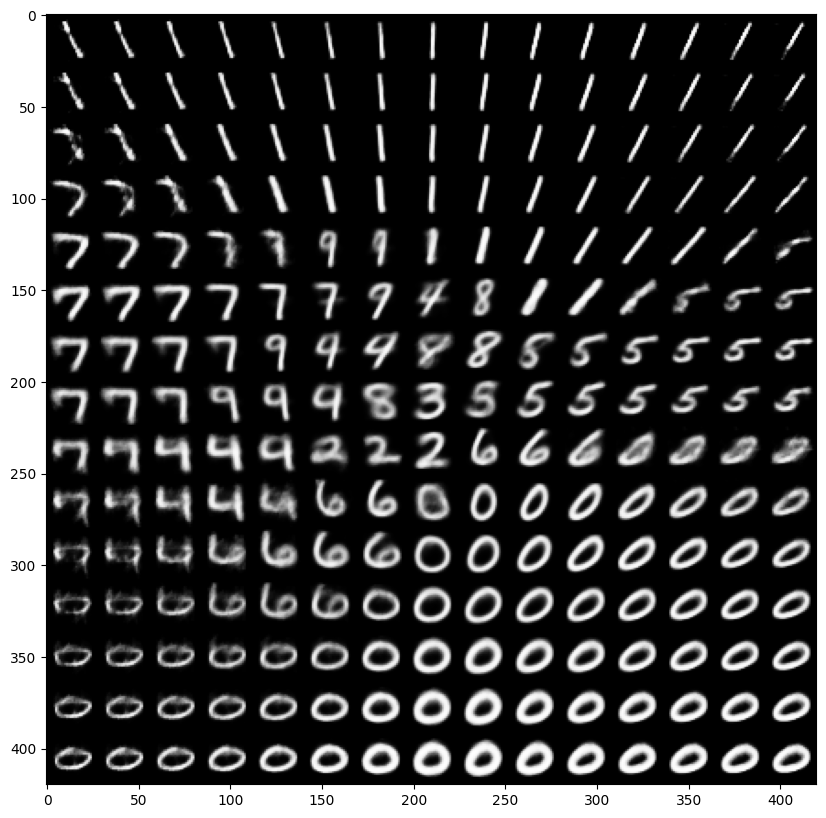

In [ ]:
# Vanilla VAE results
plot_results((encoder_vanilla, decoder_vanilla), (x_test, y_test), batch_size=128, model_name="vae_mnist")

79/79 [==============================] - 1s 6ms/step


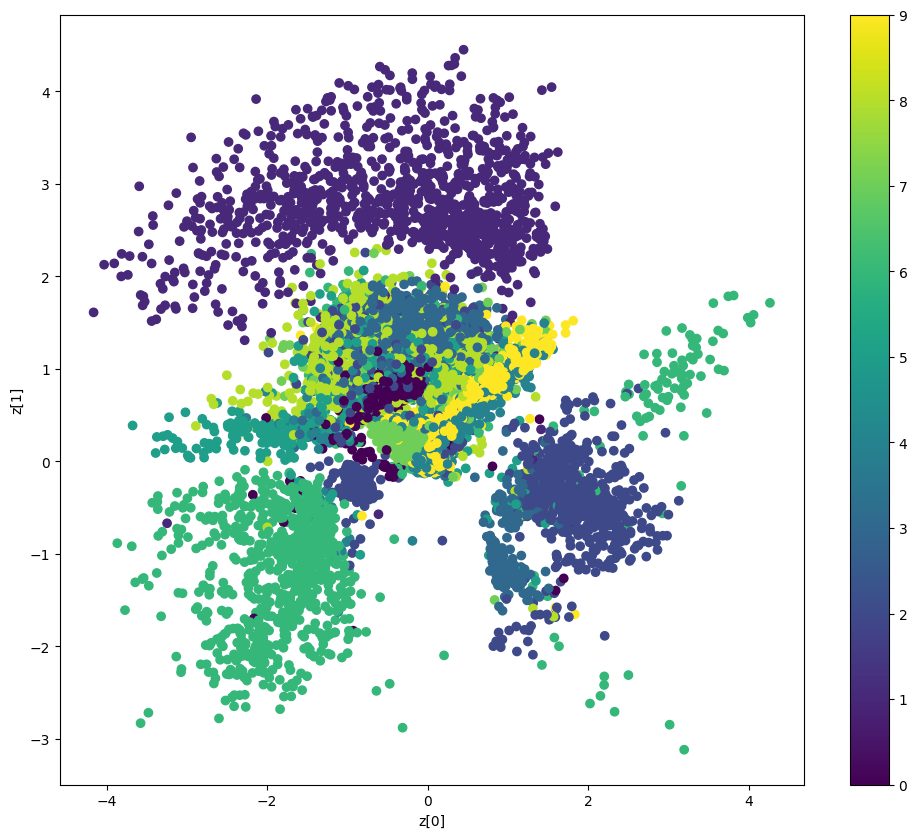

1/1 [==============================] - 0s 41ms/step


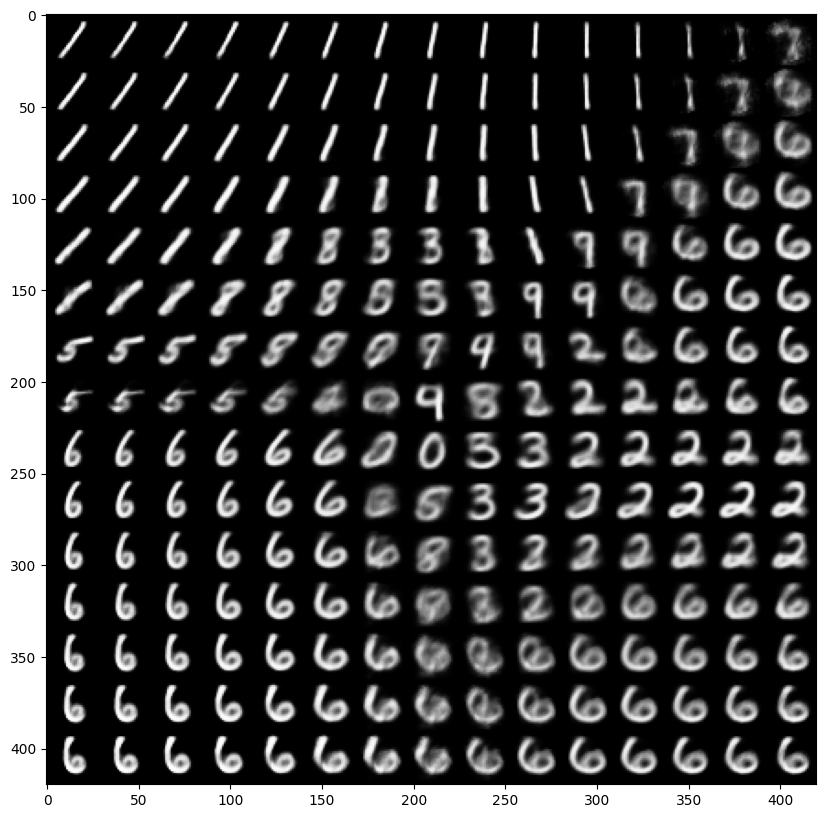

In [ ]:
# Encoder with Encoder-Decoder VAE results
plot_results((encoder_encoder, decoder_encoder), (x_test, y_test), batch_size=128, model_name="vae_mnist")

79/79 [==============================] - 1s 5ms/step


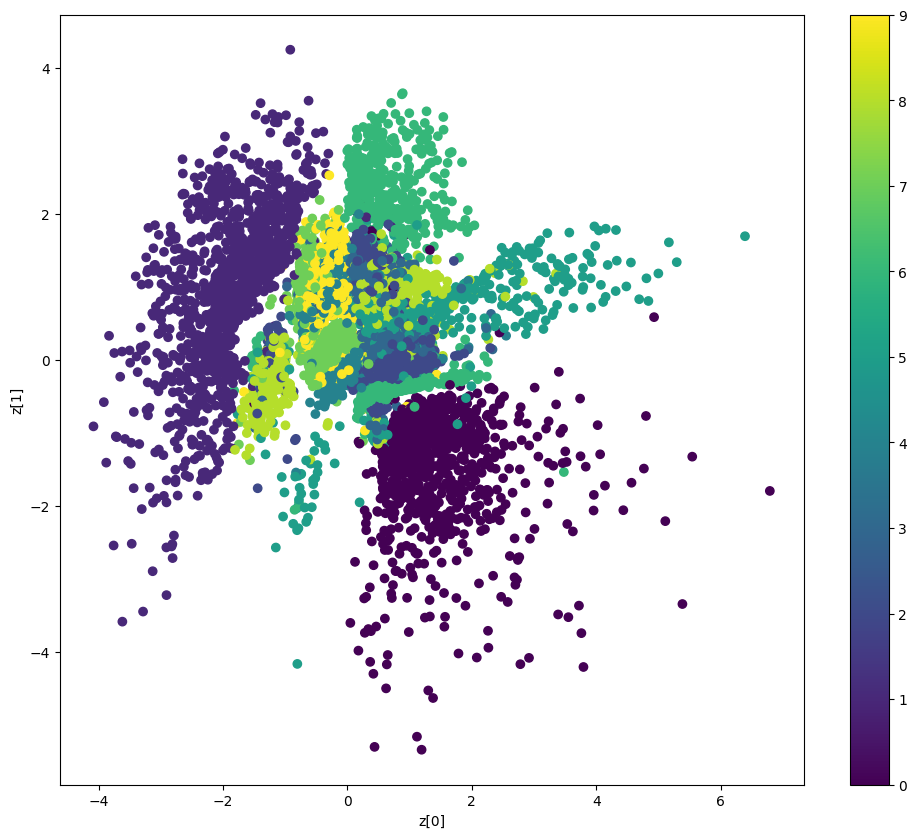

1/1 [==============================] - 0s 15ms/step


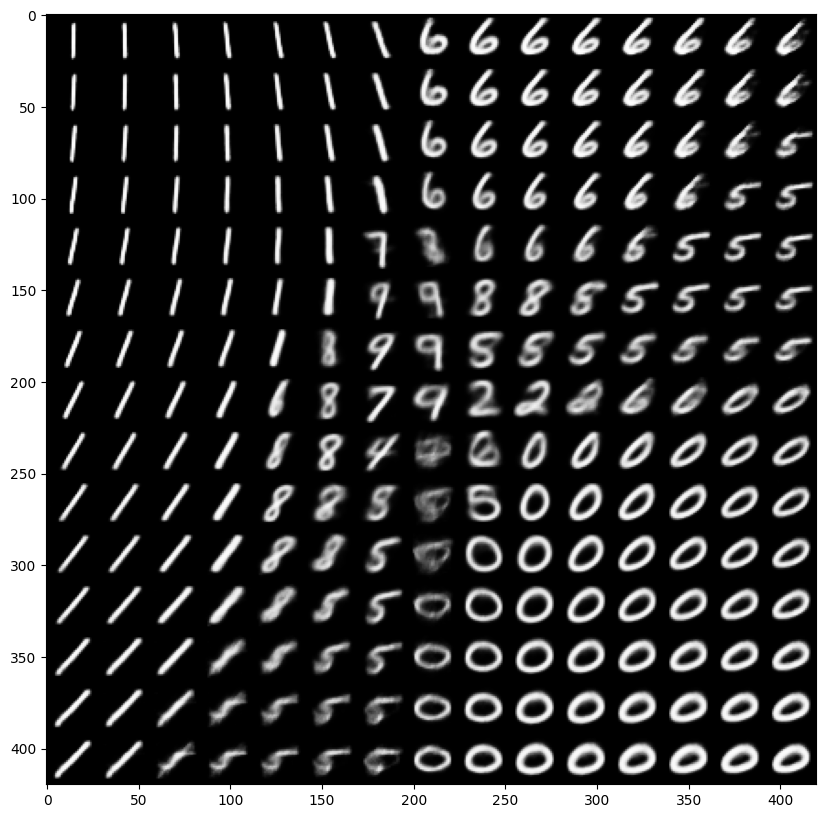

In [ ]:
# Dncoder with Encoder-Decoder VAE results
plot_results((encoder_decoder, decoder_decoder), (x_test, y_test), batch_size=128, model_name="vae_mnist")

79/79 [==============================] - 1s 7ms/step


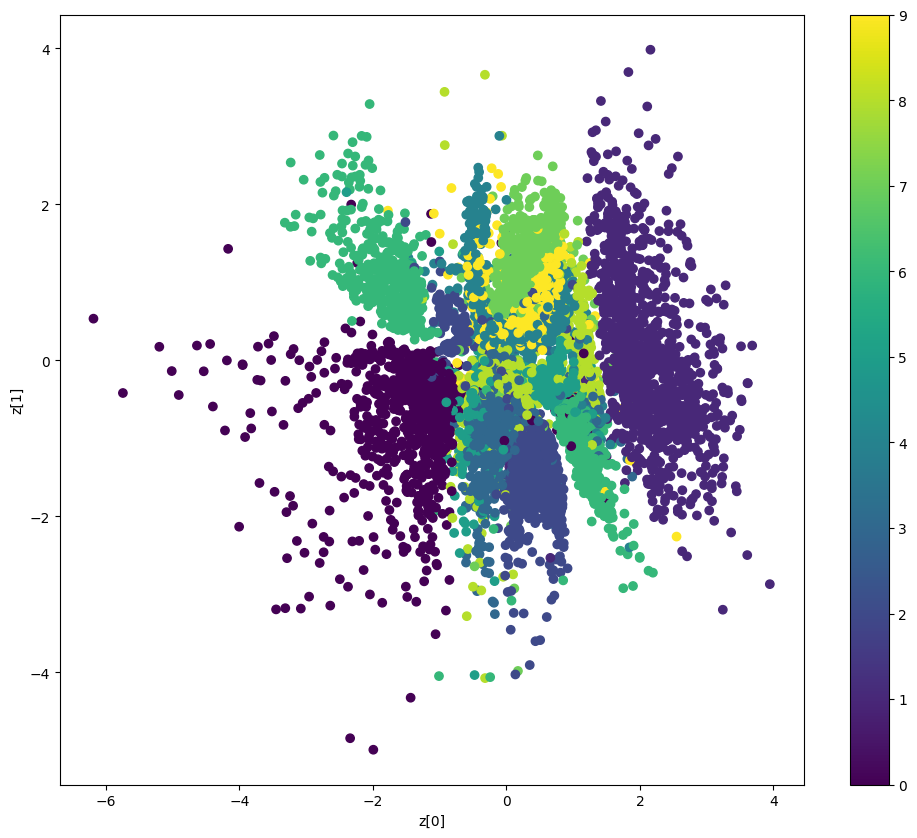

1/1 [==============================] - 0s 15ms/step


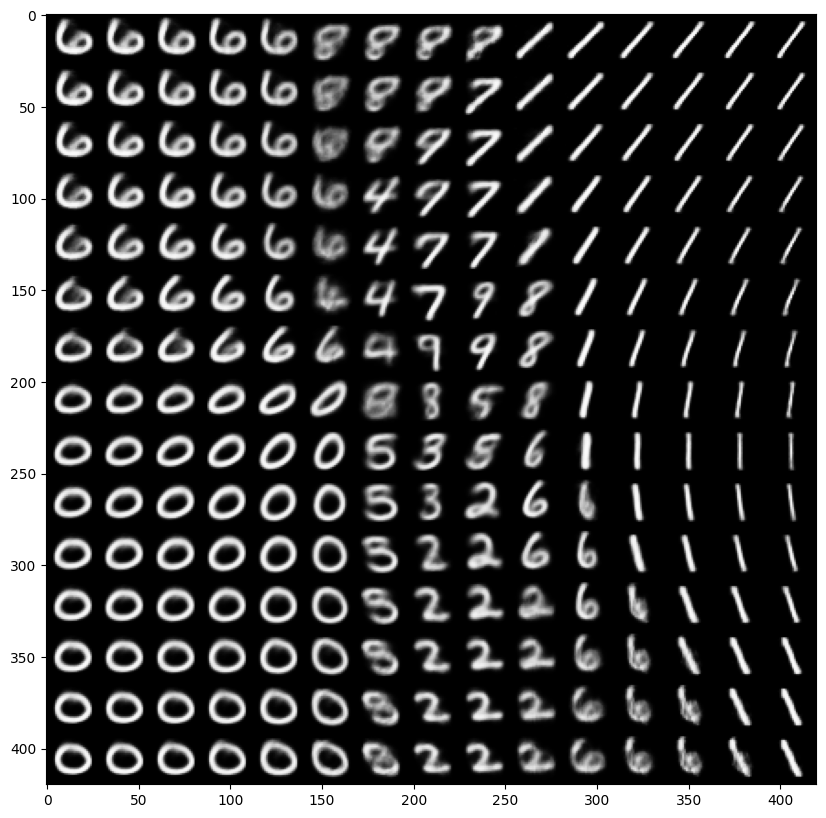

In [ ]:
# Encoder and Decoder with Encoder-Decoder VAE results
plot_results((encoder, decoder), (x_test, y_test), batch_size=128, model_name="vae_mnist")

#Inferences
The VAE where both encoder and decoder have encoder-decoder architecture gives a more defined and differentiating latent space as compared to all other three architectures.

The VAE having encoder with encoder-decoder architecture and the VAE having decoder with encoder-decoder architecture have significant differences in the numbers they can generate but none of them could generate all the digits. The first was unable to generate 4 whereas the latter could not generate 3. Though not very significant, there's still improvement as compared to the vanilla VAE.

#Discussion
I am not completely sure about why is the VAE with autoencoders for encoder and decoder works better than the vanilla VAE but these can be some reasons:

One of the reasons why the fourth model works better than the vanilla VAE can maybe be because the encoder-decoder architecture of the encoder is able to compress more information than a simple encoder in the latent vector and similarly the autoencoder architecture of the decoder results in better reconstructions of the original image from the latent vectors.

Another reason can be that autoencoders can introduce a sort of randomness in the model. This may not be true since autoencoders are deterministic in nature.

